In [ ]:
link do github: https://github.com/themestrre/Metodos-Numericos

**Nome:** Carlos Eduardo Leite de Oliveira

**Matricula:** 242104345

# **MÉTODOS NUMÉRICOS EM CIÊNCIAS MECÂNICAS**

# Para todos os casos relacionados somente vamos utilizar essas duas biblioteca básicas
import numpy as np
import matplotlib.pyplot as plt

# Método da bisecção



In [2]:
# Método da Bisseção
def bissecao(f, a, b, tol=1e-5, max_iter=100):
    erros = []
    for i in range(max_iter):
        c = (a + b) / 2
        erro = abs((b - a) / c)
        erros.append(erro)
        if abs(f(c)) < tol or erro < tol:
            break
        if np.sign(f(a)) * np.sign(f(c)) < 0:
            b = c
        else:
            a = c
    return c, erros

# Método da falsa posição


In [3]:
# Método da Falsa Posição corrigido
def falsa_posicao(f, a, b, tol=1e-5, max_iter=100):
    erros = []
    fa = f(a)
    fb = f(b)
    c_anterior = b  # inicialização com qualquer valor válido

    for i in range(max_iter):
        c = b - fb * (a - b) / (fa - fb)
        erro = abs((c - c_anterior) / c) if i > 0 else abs((b - a) / c)
        erros.append(erro)
        if abs(f(c)) < tol or erro < tol:
            break
        fc = f(c)
        if np.sign(fa) * np.sign(fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        c_anterior = c
    return c, erros


# Função para plot dos erros

In [4]:
def plot_erros(erros_biss, erros_fp, title):
    plt.figure()
    plt.plot(erros_biss, label='Bisseção', marker='o', linestyle='-')
    plt.plot(erros_fp, label='Falsa Posição', marker='s', linestyle='-')
    plt.yscale('log')
    plt.xlabel('Iterações')
    plt.ylabel('Erro Relativo')
    plt.title(title)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


# Definição das funções

In [5]:
# Definindo as funções do problema
f1 = lambda x: -0.5 * x**2 + 2.5 * x + 4.5
f2 = lambda x: 5*x**3 - 5*x**2 + 6*x - 2
f3 = lambda x: -25 + 82*x - 90*x**2 + 44*x**3 - 8*x**4 + 0.7*x**5
f4 = lambda x: np.sin(x) - x**3
f5 = lambda x: np.log(x**4) - 0.7

# Lista de funções com intervalos e nomes
funcoes = [
    (f1, 5, 10, "f1(x) = -0.5x² + 2.5x + 4.5"),
    (f2, 0, 1, "f2(x) = 5x³ - 5x² + 6x - 2"),
    (f3, 0.5, 1, "f3(x) = -25 + 82x - 90x² + ..."),
    (f4, 0.5, 1, "f4(x) = sin(x) - x³"),
    (f5, 0.5, 2, "f5(x) = ln(x⁴) - 0.7")
]


# Geração de resultados

-----------------------------------------------------------------------------------------------
Função                              | Método          | Raiz       | Iterações  | Erro Final  
-----------------------------------------------------------------------------------------------
f1(x) = -0.5x² + 2.5x + 4.5         | Bisseção        | 6.405125 |         18 | 5.96e-06
f1(x) = -0.5x² + 2.5x + 4.5         | Falsa Posição   | 6.405108 |         10 | 5.63e-06


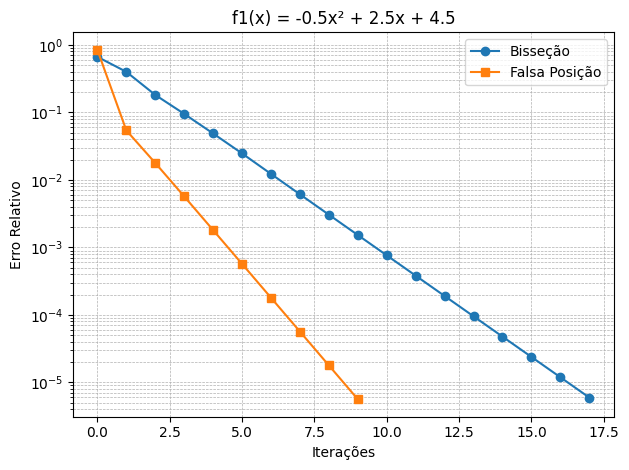

f2(x) = 5x³ - 5x² + 6x - 2          | Bisseção        | 0.418098 |         17 | 3.65e-05
f2(x) = 5x³ - 5x² + 6x - 2          | Falsa Posição   | 0.418100 |         12 | 3.71e-06


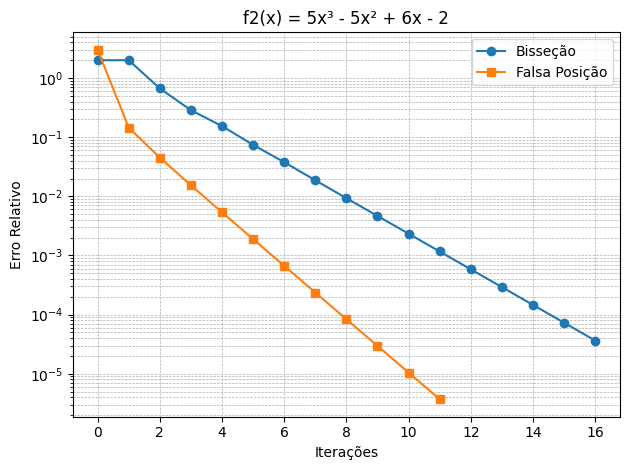

f3(x) = -25 + 82x - 90x² + ...      | Bisseção        | 0.579409 |         18 | 6.58e-06
f3(x) = -25 + 82x - 90x² + ...      | Falsa Posição   | 0.579410 |          7 | 3.74e-06


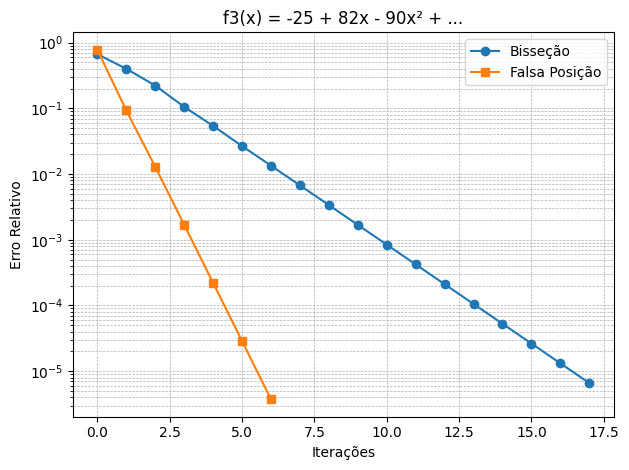

f4(x) = sin(x) - x³                 | Bisseção        | 0.928627 |         16 | 1.64e-05
f4(x) = sin(x) - x³                 | Falsa Posição   | 0.928625 |          6 | 1.08e-05


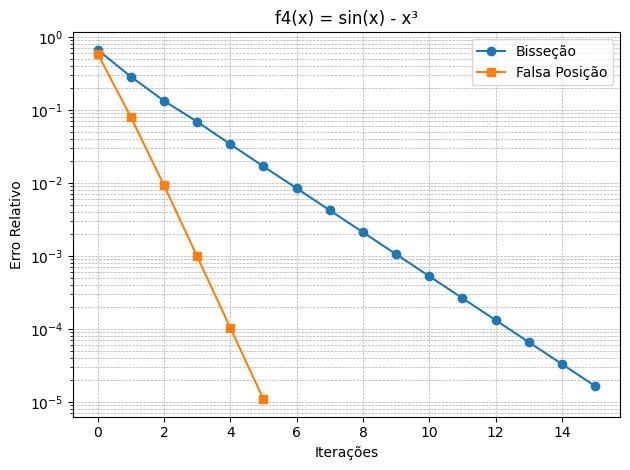

f5(x) = ln(x⁴) - 0.7                | Bisseção        | 1.191246 |         16 | 3.84e-05
f5(x) = ln(x⁴) - 0.7                | Falsa Posição   | 1.191250 |         11 | 6.47e-06


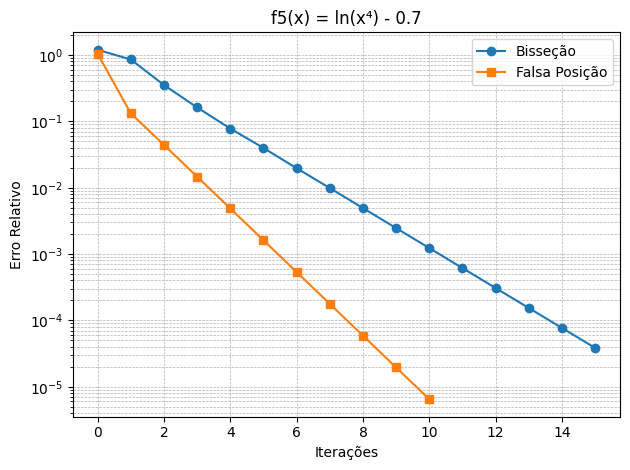

-----------------------------------------------------------------------------------------------


In [6]:
# Cabeçalho da tabela
print("-" * 95)
print(f"{'Função':35} | {'Método':15} | {'Raiz':10} | {'Iterações':10} | {'Erro Final':12}")
print("-" * 95)

# Loop pelas funções para aplicar ambos os métodos
for f, a, b, nome in funcoes:
    raiz_biss, erros_biss = bissecao(f, a, b)
    raiz_fp, erros_fp = falsa_posicao(f, a, b)

    print(f"{nome:35} | {'Bisseção':15} | {raiz_biss:.6f} | {len(erros_biss):10} | {erros_biss[-1]:.2e}")
    print(f"{nome:35} | {'Falsa Posição':15} | {raiz_fp:.6f} | {len(erros_fp):10} | {erros_fp[-1]:.2e}")

    plot_erros(erros_biss, erros_fp, nome)

print("-" * 95)

